### Dimensionality Reduction t-SNE Assignment

Jay Urbain, PhD

#### Objectives:    

-Students can explain additional popular nonlinear manifold learning techniques: **t-sne**, UMAP

-**Students can compare these techniques to each other and previously discussed techniques and understand the differences between them**

-**Students can evaluate the quality of the output of the previously discussed techniques**

-**Students can apply these techniques to a dataset**

-**Students can visualize the output of these techniques**

#### References

1. L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE.   Journal of Machine Learning Research 9(Nov):2579–2605, 2008.  
http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

2. YouTube. (2013, November 6). Visualizing Data Using t-SNE.   
https://www.youtube.com/watch?v=RJVL80Gg3lA

- SAS, Which machine learning algorithm should I use?  
https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/

- Andre Violante, An Introduction to t-SNE with Python Example  
https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

8. Comparison of Manifold Learning methods   
https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py



###  t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (`t-SNE`) is a [nonlinear dimensionality reduction technique](https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/) well-suited for embedding high-dimensional data for visualization into a low-dimensional space of two or three dimensions. 

- `t-SNE` models high-dimensional datapoints in a two- or three-dimensional space in such a way that similar datapoints are modeled by nearby points and dissimilar datapoints are modeled by distant points with high probability.

- `t-SNE` is especially effective on high-dimensional data that lie on several different, but related, low-dimensional manifolds, such as images of objects from multiple classes seen from multiple viewpoiints. For example, images of peoples heads taken from different views.

- `t-SNE` uses neighborhood graphs to capture the implicit structure of all of the data to influence the way in which a subset of the data is displayed.

`t-SNE` produces significantly better visualizations by reducing the tendency to crowd points together in the center of the map (reduced dimension space).

`t-SNE` visualization outperforms other techniques we've discussed so far including PCA, Kernel-PCA, MDS, Isomap, LLE, and MLLE.

- `t-SNE` does not preserve global data structure, so it is not suitable for clustering, or feature selection as a precursor to machine learning.

`t-SNE` was developed by [Laurens van der Maatens and Geoffrey Hinton in 2008](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).


#### t-SNE vs PCA

`Principal Components Analysis` (PCA) is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. That is, things that are different end up far apart. 

For high-dimensional data that lies on or near a low-dimensional, non-linear manifold it is usually more important to keep the low-dimensional representations of very similar datapoints close together, which is typically not possible with linear mapping. This can lead to poor visualization especially when dealing with non-linear manifold structures. 

Think of a manifold structure as any geometric shape like: cylinder, ball, curve, etc., embedded in a higher-dimensionality space. For example, a 2D sheet of paper rolled into a coil within a 3D space

`t-SNE` differs from `PCA` by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 

Similar, to local linear embedding (`LLE`), the differences in the PCA and t-SNE approaches can be illustrated with the Swiss Roll dataset.

<img src="swiss_roll_dataset.png" width="400px"/>

Source: https://www.quora.com/What-advantages-does-the-t-SNE-algorithm-have-over-PCA  

You can see that due to the non-linearity of this dataset and PCA preserving large distances, PCA would incorrectly preserve the structure of the data.

#### t-SNE Algorithm

`t-SNE` calculates a similarity measure between pairs of instances in a high dimensional space and in a low dimensional space. It then tries to optimize these two similarity measures using a cost function. 

#### Step 1. Measure similarities between points in the high dimensional space. 

`t-SNE` starts by converting the high-dimensional Euclidean distances between datapoints into conditional probabilities that represent similarities.

The similarity of datapoint $x_j$ to datapoint $x_i$ is the conditional probabiliy, $p_{j|i}$, that $x_i$ would pick $x_j$ as its neigbor if neighbors were picked in proportion to their probability density under a Guassian centered at $x_i$. 

For nearby data points, $p_{j|i}$ is relatively high. For distant points, $p_{j|i}$ is infinitesimal. Observe the vertical distances between points plotted along a normal curve.

The conditional probability, $p_{j|i}$, is given by:

$$
p_{j|i} = \dfrac{ exp(-||x_i - x_j||^2/2\sigma_i^2) }{ \sum_{k\neq i}exp(-||x_i - x_k||^2/2\sigma_i^2) }
$$

Where $\sigma^2$ is the variance of the Gaussian that is centered on datapoint $x_i$.

Points satisfy the symmetry rule by averaging their distances, i.e., the distance from $i$ to $j$ is the same as $j$ to $i$. This also results in a simpler gradient.
$$
p_{ij} = \dfrac{p_{i|j} + p_{j|i}}{2N} 
$$

The resulting distance measurements are stored in an $NxN$ matrix of similarities, $P$.

Since we're only interested in pairwise similarities, the diagonal representing the value of $p_{i|i}$ is set to zero.

The Gaussian distribution about $x_i$ can be manipulated using [perplexity](https://en.wikipedia.org/wiki/Perplexity), which is a measurement of how well a probability distribution or probability model predicts a sample.

Perplexity influences the variance of the distribution (circle size) and consequently the number of nearest neighbors.

A normal range for perplexity is between 5 and 50.

The perplexity of a discrete probability distribution $p$ is:
    
$$
2^{{H(p)}}=2^{{-\sum _{x}p(x)\log _{2}p(x)}}
$$

where $H(p)$ is the entropy (in bits) of the distribution and x ranges over events.


This gives a set of probabilities $P_{ij}$ for all points. 

Those probabilities are proportional to the similarities. 

In the guassian plot below, notice how the vertical distance between the point at $x=8$ and $x=10$ is much more than $2x$ the distance between $x=8$ and $x=10$. In this wa, `t-SNE` keeps local points close and makes far away points *very* far away.


#### 2. Measure similarities between points in the low dimensional space. 

A similar conditional probability $q_{j|i}$ is calculated for low-dimensional counterparts $y_i$ and $y_j$, of the high-dimensional datapoints $x_i$ and $x_j$.

To address the **crowding problem**, where nearby points projected from the high-dimensional space to the low-dimensional map have a tendency to crowd, `t-SNE` uses a `Student t-distribution` rather than a Gaussian distribution.

The heavy tails of the `Student t-distribution` are used to overcome the crowding of points when embedding into low dimensions.

To employ the `Student t-distribution` with one-degree of freedom, the joint probabilities $q_{ij}$ are defined as:
$$
q_{ij} = \dfrac{ (1 + ||y_i - y_j||^2)^{-1} }{ \sum_{k\neq l}(1 + ||y_k - y_l||^2)^{-1} }
$$

<img src="normal_vs_cauchy.png" width="400px"/>

Source: https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668    


#### 3. Set probabilities from the low-dimensional space $Q_{𝑖𝑗}$ to reflect the probabilities of the high dimensional space $P_{𝑖𝑗}$ as similar as possible. 

If the map points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional datapoints $x_i$ and $x_j$, the conditional probabilities $p_{j|i}$ and $q{j|i}$ will be equal.

Motivated by this, `SNE` aims to find a low-dimensional data representation that minimizes the mismatch between $p_{i|j}$ and $q_{j|i}$.

To measure the differences between these two distributions, `t-SNE` minimizes the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (KL) between a joint probability distribution, $P$, in the high-dimensional space and a joint probability distrbution, $Q$, in the low-dimensional space. The cost function $C$ is given by:

$$
C = KL(P||Q) = \sum_i \sum_j p_{i|j} log \dfrac {p_{i|j}}{q_{i|j}}
$$

Where $P_i$ represents the conditional probability distribution over all other datapoints given datapoint $x_i$, and $Q_i$ represents the conditional probability distribution over all other map points given map datapoint $y_i$.

The `KL Divergence` measurement is asymmetric which results in further penalizing distant points.

The final free parameter is the variance $\sigma_i$ in the Gaussian that is centered over each high_dimensional point $x_i$.

Any value for $\sigma_i$ induces a probability distribution, $P_i$, over all datapoints. This distribution has an entropy which increases as $\sigma_i$ increases.

`SNE` performs a binary search for the value of $\sigma_i$ that prodces a $P_i$ with a fixed perplexity specified by the user. The perplexity increases monotonically with the variance $\sigma_i$.

$$
Perp(P_i) = 2^{H(P_i)} \\
H(P_i) = -\sum_j p_{j|i} log_2(p_{j|i})
$$

Gradient descent is used to minimize the cost function, $C$:

$$
\dfrac{ {\partial C} }{ {\partial y_i} } = 4 \sum_j (p_{i|j} - q_{i|j})(y_i - y_j)   
$$


### Fashion-MNIST

https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each training and test example is assigned to one of the following labels:

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot  


In [0]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits

X_fashion_mnist, y_fashion_mnist = fetch_openml('fashion-mnist', version=1, return_X_y=True)

In [4]:
X_fashion_mnist.shape

(70000, 784)

(70000, 784)

In [5]:
X_fashion_mnist_disp = X_fashion_mnist.reshape(70000, 28, 28)
X_fashion_mnist_disp.shape

(70000, 28, 28)

In [6]:
y_fashion_mnist.shape

(70000,)

In [7]:
y_fashion_mnist.reshape((-1))

array(['9', '0', '0', ..., '8', '1', '5'], dtype=object)

Train: X=(70000, 784), y=(70000,)


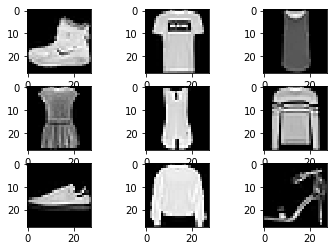

In [8]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot

print('Train: X=%s, y=%s' % (X_fashion_mnist.shape, y_fashion_mnist.shape))
#print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_fashion_mnist_disp[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
#RS = 123

In order to visualize the results of both the algorithms, the fashion_scatter() function takes two arguments: `x`, which is a 2D numpy array containing the output of the algorithm and `colors`, which is 1D numpy array containing the labels of the dataset. 

The function will render a scatter plot with as many unique colors as the number of classes in the variable colors.



In [0]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

To make sure we don’t over burden our machine we will only use the first 20,000 samples to run the algorithms. 

We should aslo check if the first 20000 samples cover samples from all the 10 classes.

In [11]:
# Subset first 20k data points to visualize
x_subset = X_fashion_mnist[0:20000]
y_subset = y_fashion_mnist[0:20000]
y_subset = y_subset.astype(int)

print(np.unique(y_subset))
x_subset.shape

[0 1 2 3 4 5 6 7 8 9]


(20000, 784)

Use PCA on the subset data and visualize its output using Y

In [12]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 1.6557564735412598 seconds


Store all four principal components in a new DataFrame `pca_df` and check the amount of variance of the data explained by these four components.

In [13]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


Note: that the first and second principal components explain ~48% of the variance in the data `x_subset`. 

Use the first two components for visualization using the fashion_scatter() function.

(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664234802, -689.6949155555558, '0'),
  Text(42.86381926024317, -1429.3643908439544, '1'),
  Text(1098.2843326493714, 376.9753232989355, '2'),
  Text(329.2719860675548, -1111.4898090685622, '3'),
  Text(1266.9709868263367, 295.46620083996237, '4'),
  Text(-1589.5573233916284, 61.86773393884624, '5'),
  Text(713.4727983673326, -65.68701122222873, '6'),
  Text(-1521.4109429509888, 335.66562531587067, '7'),
  Text(63.817681717388965, 1003.3250404665263, '8'),
  Text(-645.6906091270125, 1168.2384038897435, '9')])

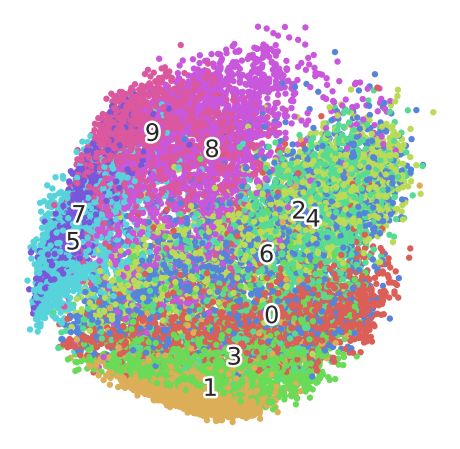

In [14]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

PCA has tried to separate the different points and form clustered groups of similar points. 

We will repeat this exercise using the `t-SNE` algorithm. 

Scikit-learn has an implementation of t-SNE available, and you can check its documentation here. It provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

- n_components (default: 2): Dimension of the embedded space.

- perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.

- early_exaggeration (default: 12.0): Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them.

- learning_rate (default: 200.0): The learning rate for t-SNE is usually in the range (10.0, 1000.0).

- n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.

- method (default: ‘barnes_hut’): Barnes-Hut approximation runs in $O(NlogN)$ time. method=’exact’ will run on the slower, but exact, algorithm in $O(N^2)$ time.

Start out by running t-SNE on x_subset with default parameters.


In [0]:
RS=123 
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

It can be seen that t-SNE takes considerably longer time to execute on the same sample size of data than PCA.

Visualizing the output of t-SNE using fashion_scatter() function:

In [0]:
fashion_scatter(fashion_tsne, y_subset)

### Assignment: PCA vs. t-SNE on Breast Cancer Data Set

Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Perform the following steps without and then with standard scaling of the dataset.

1) Perform PCA analysis on the breast cancer dataset using 2 components.

2) Plot the first 2 principal components.

3) Apply t-SNE to the breast cancer dataset.
- You will have to experiment with perplexity (5, 50) and number of iterations (>1000).

4) Plot your t-SNE projections adjacent to your PCA plot and record your observations

5) Repeat steps 4 and 5 until you are satisfied with t-SNE being able to separate classes in the data set.

6) Record your optimal perplexity and iterations for t-SNE. Compare the PCA and t-SNE visualizations and record your results.

#### Breast Cancer Wisconsin Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Description of attributes:

- id - ID number

- diagnosisThe diagnosis of breast tissues (M = malignant, B = benign)

- radius_meanmean of distances from center to points on the perimeter

- texture_meanstandard deviation of gray-scale values

- perimeter_meanmean size of the core tumor

- area_mean

- smoothness_meanmean of local variation in radius lengths

- compactness_meanmean of perimeter^2 / area - 1.0

- concavity_meanmean of severity of concave portions of the contour

- concave points_meanmean for number of concave portions of the contour

- symmetry_mean

- fractal_dimension_meanmean for "coastline approximation" - 1

- radius_sestandard error for the mean of distances from center to points on the perimeter

- texture_sestandard error for standard deviation of gray-scale values

- perimeter_se

- area_se

- smoothness_sestandard error for local variation in radius lengths

- compactness_sestandard error for perimeter^2 / area - 1.0

- concavity_sestandard error for severity of concave portions of the contour

- concave points_sestandard error for number of concave portions of the contour

- symmetry_se

- fractal_dimension_sestandard error for "coastline approximation" - 1

- radius_worst"worst" or largest mean value for mean of distances from center to points on the perimeter

- texture_worst"worst" or largest mean value for standard deviation of gray-scale values

- perimeter_worst

- area_worst

- smoothness_worst"worst" or largest mean value for local variation in radius lengths

- compactness_worst"worst" or largest mean value for perimeter^2 / area - 1.0

- concavity_worst"worst" or largest mean value for severity of concave portions of the contour

- concave points_worst"worst" or largest mean value for number of concave portions of the contour

- symmetry_worst

- fractal_dimension_worst"worst" or largest mean value for "coastline approximation" - 1

In [2]:
import pandas as pd
from IPython.display import HTML

df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast-cancer-wisconsin-data.csv")
HTML(df.to_html())
print(df.shape)
print(df.dtypes)
df.head(n=3)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


The id and Unnamed: 32 columns should be removed, since they are unnecessary. The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

In [3]:
df.shape

(569, 33)

In [0]:
# Remove unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [5]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['diagnosis'].unique()))

Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": ['M' 'B'

#### Data exploration

In [6]:
#Checking the dimensions
df.shape

(569, 31)

In [7]:
# Generate statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plot pairwise relationships to check the correlations between the mean features.

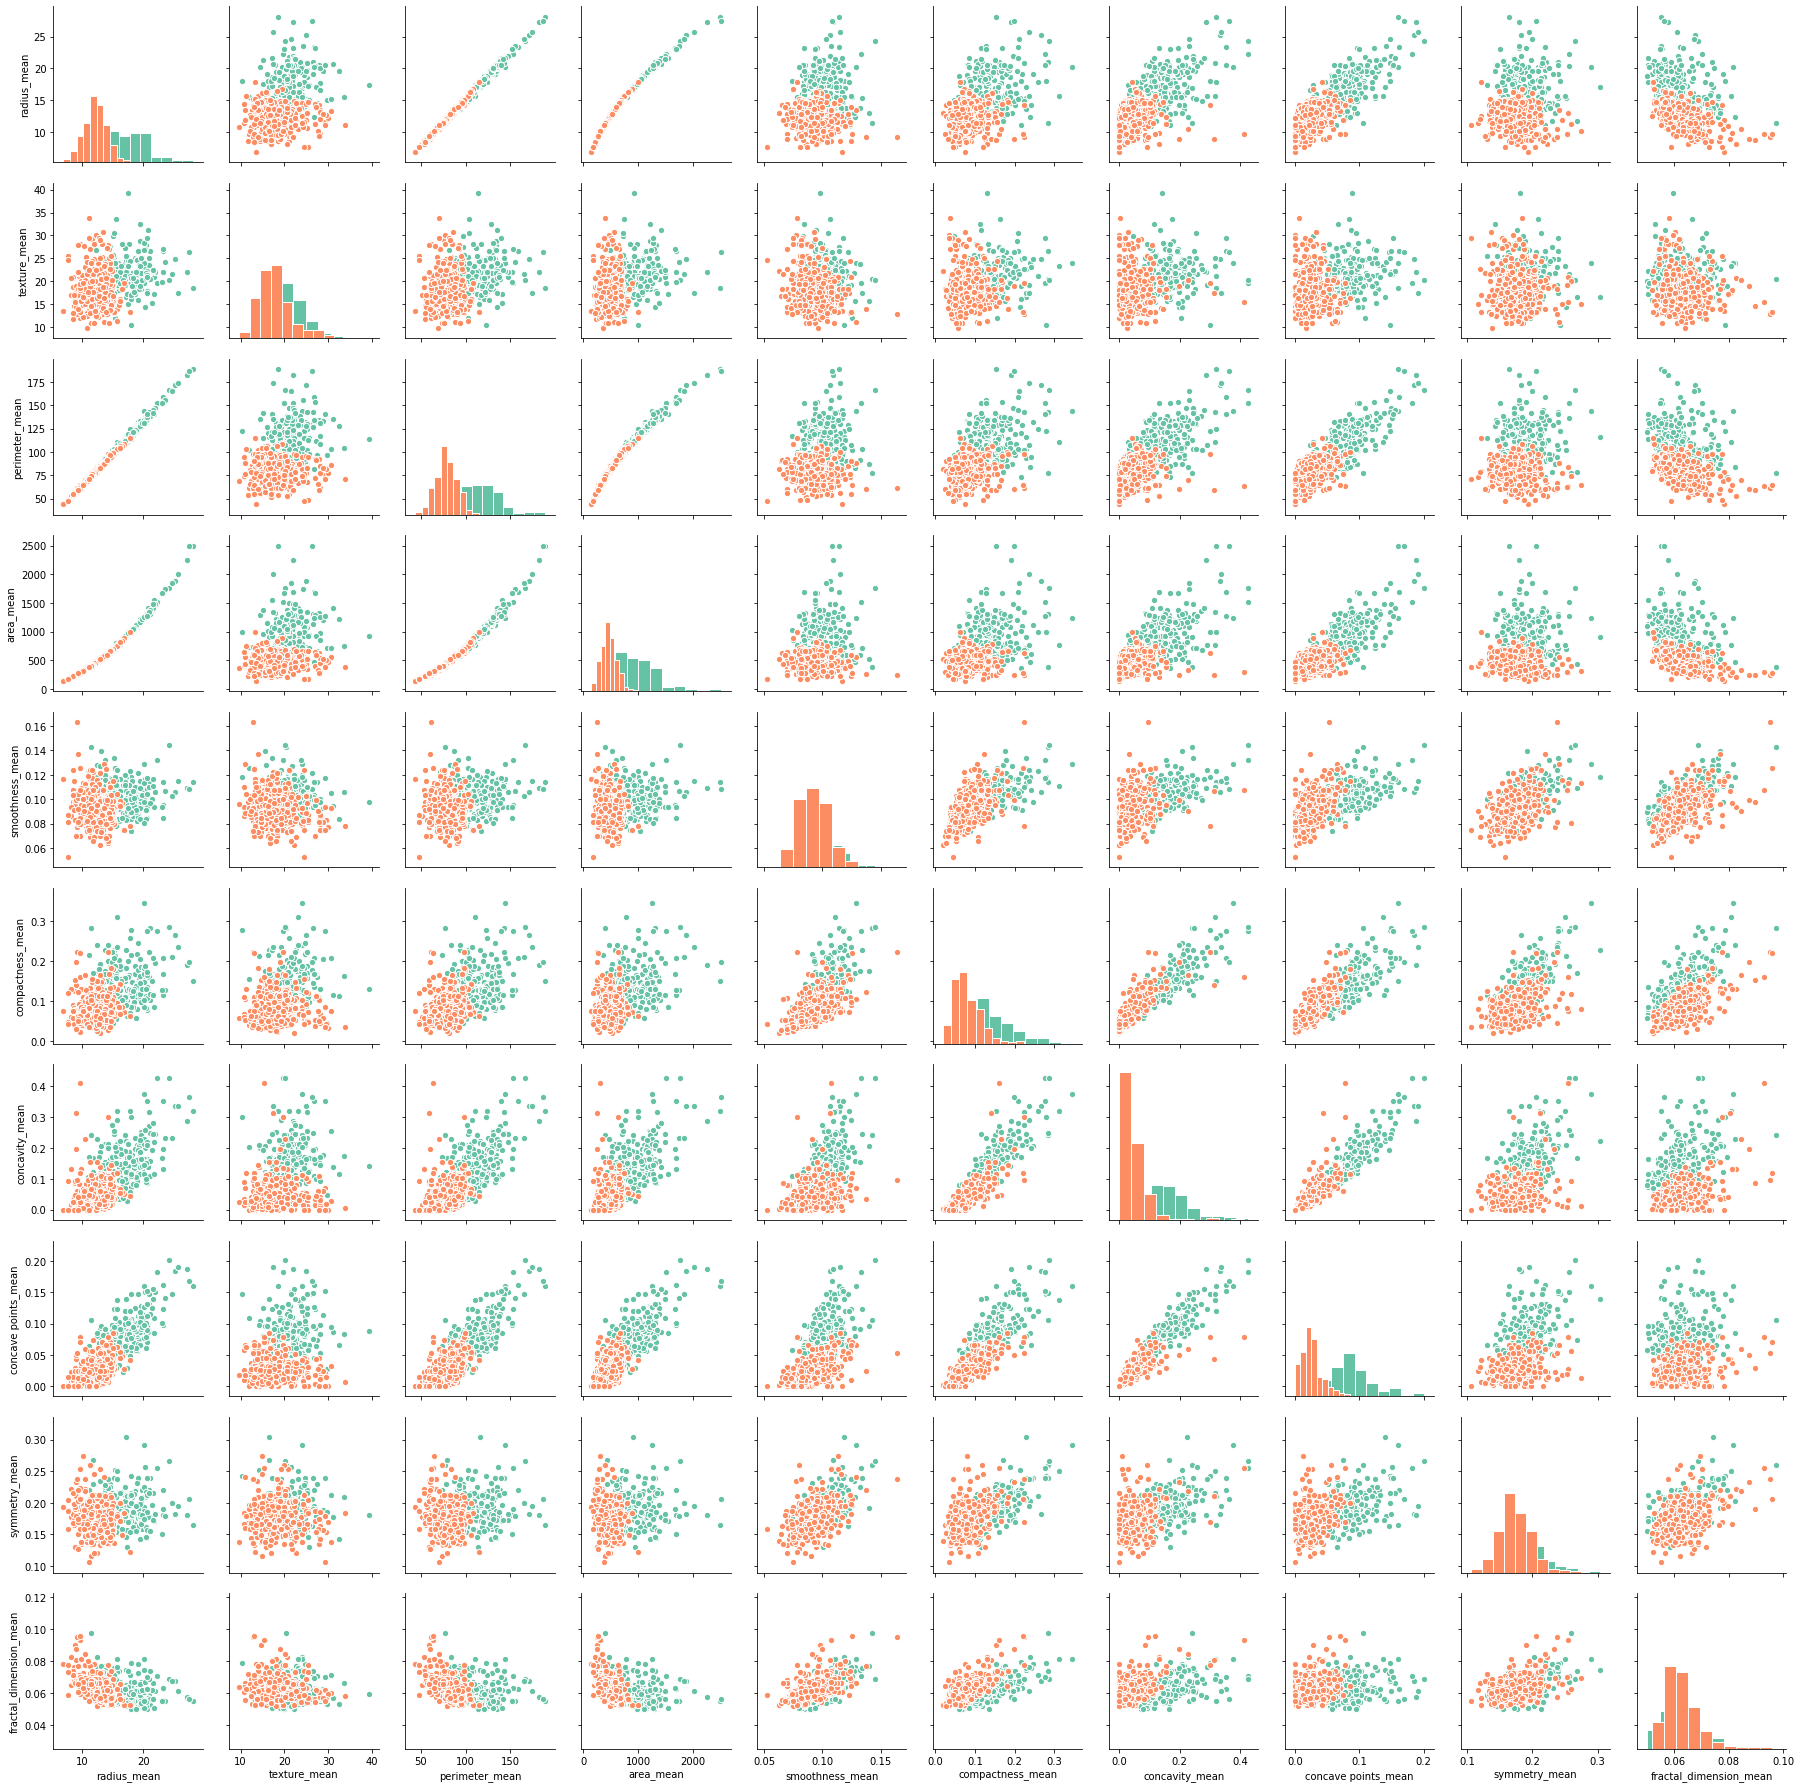

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40);


Store the diagnosis column in a target object and then drop it

In [0]:
target = df['diagnosis']
data = df.drop('diagnosis', axis=1)

#### Visualizing PCA and t-SNE Plots

- Instantiate a PCA instance with `n_components`=2

- Fit and transform your PCA model on data `X`

- Instantiate a TNSE instance with `n_components`=2, `verbose`=1, and experiment with the `perplexity` and `n_iter` parameters. `perplexity` should be between 5 and 50. `n_iterations` > 1000.

- Fit and transform your TSNE model on data `X`

In [0]:
pip install MulticoreTSNE

In [0]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module
from MulticoreTSNE import MulticoreTSNE as TSNE

In [0]:
# Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's use n_components = 2
pca = PCA (n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
# instantiate a TNSE instance
tsne = TSNE(n_components=2, verbose=1,perplexity= 25, n_iter=2000)
tsne_results = tsne.fit_transform(X)

Plot the results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


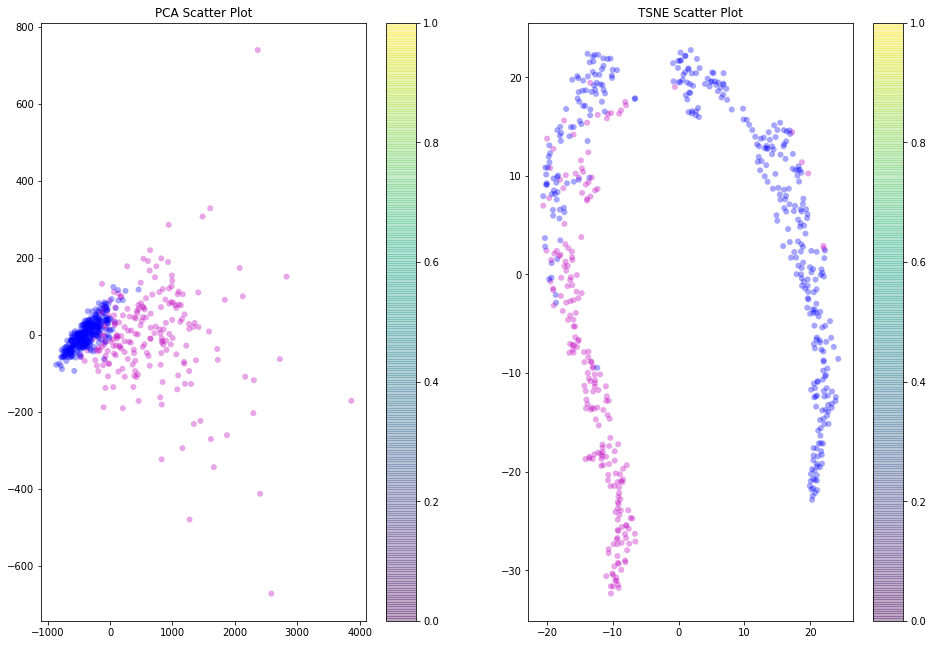

In [15]:
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

#### Record your observations on the PCA and TSNE plots.

As one can see from these high-level plots, even though PCA does quite a decent job of visualising our two target clusters ( M for Malignant and B for Benign - cheating a bit here with the labels), the visuals in TSNE is much more obvious in terms of the demarcation in the target.

#### Standardization and Visualization

Try scaling (or standardising) our features and see if we can get even more obvious/intuitive clusters in our plots.

Use StandardScaler to standardize `X` and repeat the experiment.

In [0]:
# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_std = scale.fit(X)

In [0]:
# Invoke the PCA method on the standardised data
pca = PCA (n_components=2)
pca_2d_std = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1,perplexity= 25, n_iter=2000)
tsne_results_std = tsne.fit_transform(X)

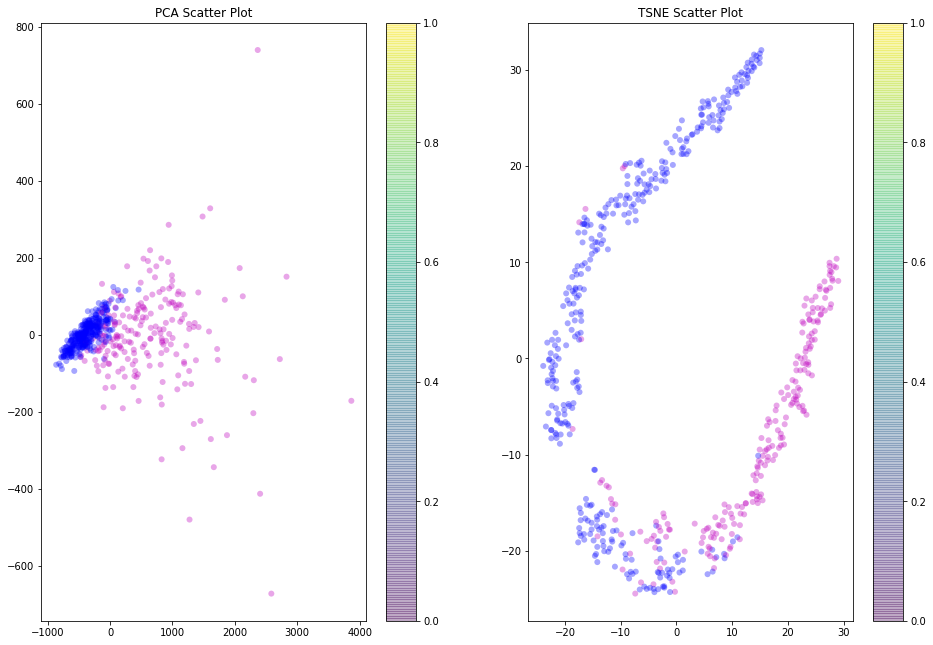

In [18]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show();

#### Record your observations
    
t-SNE with perplexity=40 and 2000 iterations works well

PCA also works well, but not quite as good (better than I thought ;-)


In [0]:
# Invoke the PCA method on the standardised data
pca = PCA (n_components=2)
pca_2d_std = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1,perplexity= 25, n_iter=1000)
tsne_results_std = tsne.fit_transform(X)

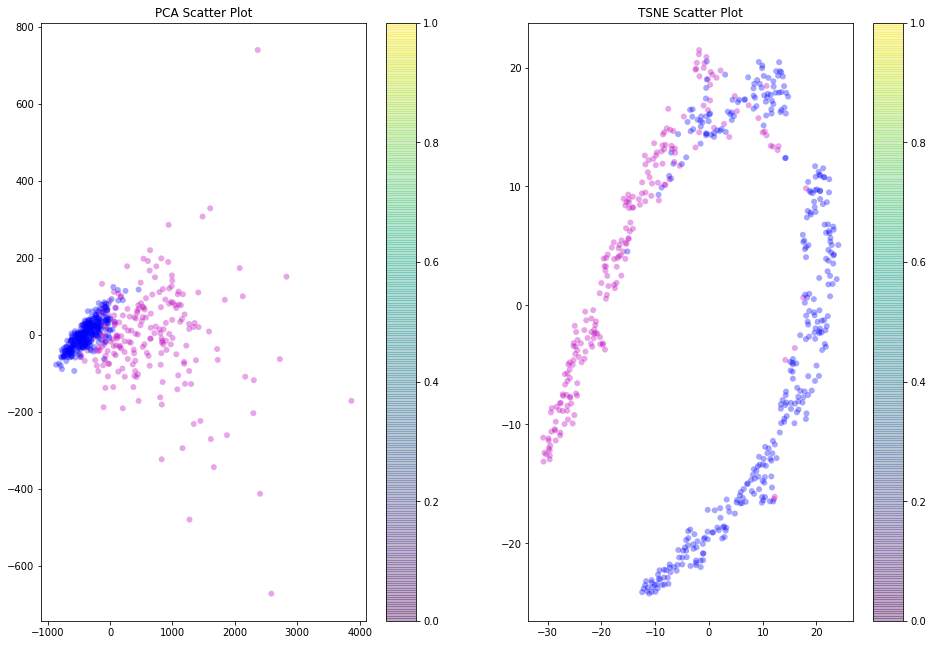

In [27]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d_std[:,0],pca_2d_std[:,1], c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:,0],tsne_results_std[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show();